In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qdatoolkit as qda
import os

# Read all files named as layer_xxx in the folder 'data'
file_path = "data/stacked_data.csv"
df = pd.read_csv(file_path)


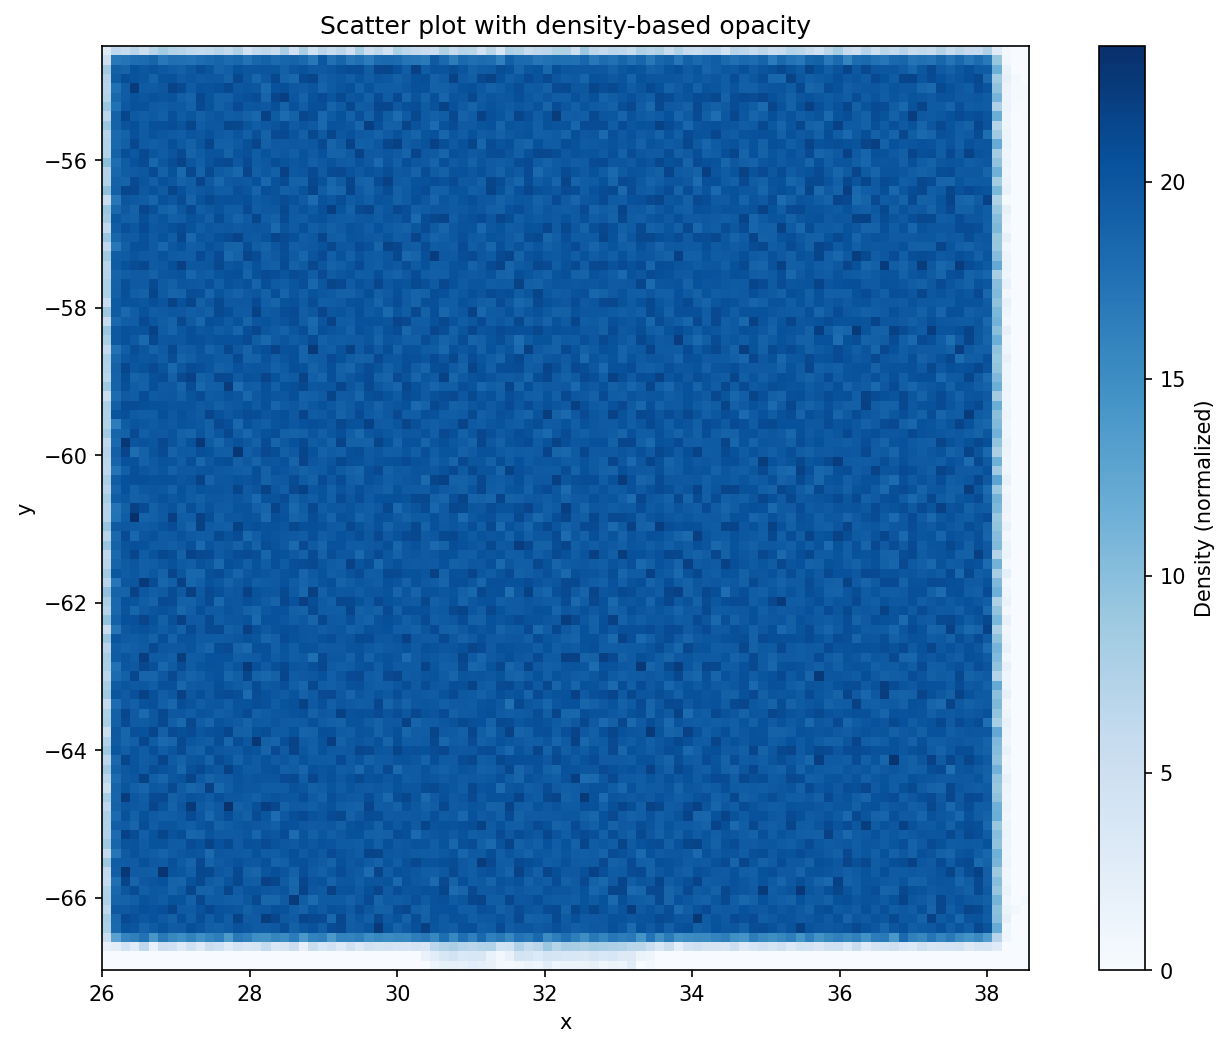

In [2]:
# Create a 2D histogram to calculate density
plt.figure(figsize=(12, 8), dpi=150)

# Combine all data points into a single array from all layers
all_points = df[['x', 'y']].values  # Extract x and y columns from the entire dataset

# Create a 2D histogram
x_bins = np.linspace(all_points[:, 0].min(), all_points[:, 0].max(), 100)
y_bins = np.linspace(all_points[:, 1].min(), all_points[:, 1].max(), 100)
hist, x_edges, y_edges = np.histogram2d(all_points[:, 0], all_points[:, 1], bins=[x_bins, y_bins])

# Normalize the histogram to get opacity values
# Use the number of unique layers (layer_id) for normalization
num_layers = df['layer_id'].nunique()
hist_normalized = hist / num_layers

# Plot the histogram as an image
plt.imshow(hist_normalized.T, extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]],
           origin='lower', cmap='Blues', alpha=1)

plt.title('Scatter plot with density-based opacity')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Density (normalized)')
plt.show()

In [7]:
# Count the occurrences of each point across layers
point_counts = {}
for _, row in df.iterrows():
	point = (row['x'], row['y'])
	if point in point_counts:
		point_counts[point] += 1
	else:
		point_counts[point] = 1

# Filtra i punti che sono presenti in almeno 4 layer
point_counts_array = np.array(list(point_counts.values()))
filtered_points = np.array([point for point, count in point_counts.items() if count >= 4])

# Check if filtered_points is not empty before calculating min and max values
if filtered_points.size > 0:
	filtered_points = np.array(filtered_points)  # Ensure it's a numpy array
	x_min = filtered_points[:, 0].min()
	x_max = filtered_points[:, 0].max()
	y_min = filtered_points[:, 1].min()
	y_max = filtered_points[:, 1].max()

	print(f"x_min: {x_min}, x_max: {x_max}")
	print(f"y_min: {y_min}, y_max: {y_max}")
else:
	print("No points found with count 4= 2.")


x_min: 26.264, x_max: 38.053
y_min: -66.506, y_max: -54.848


In [8]:
xrange= x_max-x_min
yrange= y_max-y_min

print(f"xrange: {xrange}, yrange: {yrange}")

xrange: 11.788999999999998, yrange: 11.658000000000001
